In [2]:
import torch
import torch.nn.functional as F
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Dataset Link : https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

In [4]:
with open('names.txt') as f:
    names = f.read().splitlines()

In [5]:
len(names)

32033

In [6]:
tokens = ['.'] + list(string.ascii_lowercase)
t_i = {t:i for i,t in enumerate(tokens)}
i_t = {i:t for t,i in t_i.items()}

In [7]:
# creating training set

inputs = []
targets = []

In [8]:
for word in names[:1]:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]):
        r = t_i[ch1]
        c = t_i[ch2]
        inputs.append(r)
        targets.append(c)

In [9]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
inputs, targets

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [10]:
# we one-hot encode these int tensors

X_enc = F.one_hot(inputs, num_classes=len(tokens))

torch.Size([5, 27])


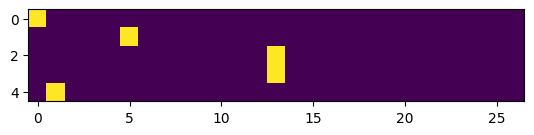

In [11]:
print(X_enc.shape)
plt.imshow(X_enc)

In [12]:
X_enc.dtype # we need float for inputs not int64

torch.int64

In [13]:
# We need to convert them into float32
X_enc.float()

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
w = torch.randn(size=(len(tokens),1))
"""
w: 27x1
X: 5x27

X@w: 5x1
"""
X_enc.float() @ w

tensor([[ 0.5952],
        [ 0.6204],
        [ 1.6618],
        [ 1.6618],
        [-0.1022]])

In [15]:
# let's use 27 neurons, because for each given input example, we will have 27 values, each showing the likelihood of the next character. The correct target should have the highest value and we will train it in this manner
# weights of each neuron are along the column
"""
w: 27x27
X: 5x27

X@w: 5x27
"""

w = torch.randn(size=(27,27))
(X_enc.float() @ w).shape

torch.Size([5, 27])

In [16]:
# Since the numbers are some random positive and negative values. We interpret them as log counts.
# And since we want to generate the table that we build in bigram, but this time using NN,
# We will exponentiate them, so all will become positive numbers, and then we can get the probabilities

logits = (X_enc.float() @ w)
counts = logits.exp()
probs = counts / counts.sum(1 , keepdims = True)
# The last two lines are called softmax.
probs

tensor([[0.0065, 0.0147, 0.0149, 0.0386, 0.0260, 0.0150, 0.0350, 0.0055, 0.0058,
         0.0025, 0.0126, 0.0357, 0.0319, 0.0332, 0.0282, 0.1587, 0.0153, 0.0068,
         0.0883, 0.0403, 0.2433, 0.0094, 0.0398, 0.0200, 0.0242, 0.0182, 0.0297],
        [0.0108, 0.0373, 0.0436, 0.0105, 0.0102, 0.0165, 0.0241, 0.0103, 0.1565,
         0.0411, 0.0274, 0.0314, 0.0054, 0.0460, 0.0130, 0.0259, 0.0368, 0.0071,
         0.0661, 0.0635, 0.0202, 0.0267, 0.0287, 0.0333, 0.1392, 0.0316, 0.0365],
        [0.0106, 0.0257, 0.0100, 0.0362, 0.0035, 0.0116, 0.0426, 0.1217, 0.0122,
         0.0041, 0.0221, 0.0513, 0.1904, 0.0458, 0.0067, 0.0326, 0.0191, 0.0270,
         0.1061, 0.0093, 0.0112, 0.0307, 0.0313, 0.0737, 0.0388, 0.0023, 0.0232],
        [0.0106, 0.0257, 0.0100, 0.0362, 0.0035, 0.0116, 0.0426, 0.1217, 0.0122,
         0.0041, 0.0221, 0.0513, 0.1904, 0.0458, 0.0067, 0.0326, 0.0191, 0.0270,
         0.1061, 0.0093, 0.0112, 0.0307, 0.0313, 0.0737, 0.0388, 0.0023, 0.0232],
        [0.0654, 0.0347,

In [17]:
probs.sum(dim = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [18]:
targets[0] , probs[0]

(tensor(5),
 tensor([0.0065, 0.0147, 0.0149, 0.0386, 0.0260, 0.0150, 0.0350, 0.0055, 0.0058,
         0.0025, 0.0126, 0.0357, 0.0319, 0.0332, 0.0282, 0.1587, 0.0153, 0.0068,
         0.0883, 0.0403, 0.2433, 0.0094, 0.0398, 0.0200, 0.0242, 0.0182, 0.0297]))

Now we can see that, we have a target value, and the predicted probability by NN. So now we need to calculate the weights and then backpropogate to minimize the loss

In [20]:
nlls = torch.zeros(5)

for i in range(5):
  # For the i-th bigram
  x = inputs[i].item()
  y = targets[i].item()
  print('-'*25)
  print(f"bigram: {i_t[x]}{i_t[y]}\tindices: {x},{y}")
  print(f"neural network input: {x}")
  print(f"output probabilities: {probs[i]}")
  print(f"actual output [label]: {y}")
  p = probs[i,y]
  print(f"predicted label probability: {p.item()}")

  logp = torch.log(p)
  nll = -logp
  print(f"log likelihood: {logp}\tnegative log likelihood: {nll}")
  nlls[i] = nll
  print('-'*25)

print('==='*10)
print(f"average nll: {nlls.mean().item()}")

-------------------------
bigram: .e	indices: 0,5
neural network input: 0
output probabilities: tensor([0.0065, 0.0147, 0.0149, 0.0386, 0.0260, 0.0150, 0.0350, 0.0055, 0.0058,
        0.0025, 0.0126, 0.0357, 0.0319, 0.0332, 0.0282, 0.1587, 0.0153, 0.0068,
        0.0883, 0.0403, 0.2433, 0.0094, 0.0398, 0.0200, 0.0242, 0.0182, 0.0297])
actual output [label]: 5
predicted label probability: 0.015047615393996239
log likelihood: -4.196535587310791	negative log likelihood: 4.196535587310791
-------------------------
-------------------------
bigram: em	indices: 5,13
neural network input: 5
output probabilities: tensor([0.0108, 0.0373, 0.0436, 0.0105, 0.0102, 0.0165, 0.0241, 0.0103, 0.1565,
        0.0411, 0.0274, 0.0314, 0.0054, 0.0460, 0.0130, 0.0259, 0.0368, 0.0071,
        0.0661, 0.0635, 0.0202, 0.0267, 0.0287, 0.0333, 0.1392, 0.0316, 0.0365])
actual output [label]: 13
predicted label probability: 0.046043794602155685
log likelihood: -3.07816219329834	negative log likelihood: 3.078162193

In [22]:
# We are interested in the probability that corresponds to the target : probs[input_idx , target_idx]
# input_idx = [0 , 1 , 2 , 3 , 4]
probs[torch.arange(5) , targets]

tensor([0.0150, 0.0460, 0.0458, 0.0257, 0.0654])

In [25]:
# This will help in finding the loss for the current iteration
-probs[torch.arange(5) , targets].log().mean()

tensor(3.3492)

In [26]:
seed = 2147483647
gen = torch.Generator().manual_seed(seed)
W = torch.randn((27,27), generator = gen, requires_grad = True)

In [27]:
# forward pass
x_enc = F.one_hot(inputs, num_classes=len(tokens)).float()
logits = x_enc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

# backward pass

W.grad = None # This is equivalent to W.grad = 0
loss = -probs[torch.arange(5), targets].log().mean()
loss.backward()

# optimization step
W.data += -0.1 * W.grad

In [28]:
logits = x_enc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(5), targets].log().mean()
loss.item()

3.7492127418518066

# Single Layer Neural Net

In [29]:
with open('names.txt') as f:
    names = f.read().splitlines()

In [32]:
tokens = ['.'] + list(string.ascii_lowercase) # Adding '.' in the list of tokens
t_i = {t:i for i,t in enumerate(tokens)} # Converting characters to integers
i_t = {i:t for t,i in t_i.items()} # Converting integers to characters

In [37]:
inputs = []
targets = []

In [38]:
for word in names:
    word = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(word,word[1:]):
        r = t_i[ch1]
        c = t_i[ch2]
        # if the current bigram is ('.' , 'e') this means, for given input '.', the targetted output should be 'e'
        inputs.append(r)
        targets.append(c)

In [39]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

In [40]:
nums = inputs.nelement()
print(f"Number of Bigram examples : {nums}")

Number of Bigram examples : 228146


In [41]:
seed = 2147483647
generator = torch.Generator().manual_seed(seed)

In [42]:
X = F.one_hot(inputs , num_classes = len(tokens)).float() # This will generate the one hot encoding for the given inputs. The size will be (inputs , 27)
X.shape

torch.Size([228146, 27])

In [43]:
learningRate = 50 # Generally this will be between 0 to 0.001, but for this case, 50 also works
epochs = 100

In [44]:
W = torch.randn((27 , 27) , generator = generator , requires_grad = True)

In [45]:
nums = inputs.nelement()

In [46]:
for epoch in range(1,epochs+1):
  # forward pass:
  logits = X @ W
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdims=True)
  loss = -probs[torch.arange(nums), targets].log().mean()

  if epoch % 10 == 0:
      print(f"loss at epoch {epoch}:\t{loss.item()}")

  # backward pass:
  W.grad = None
  loss.backward()

  # optimization:
  W.data += -learningRate * W.grad

loss at epoch 10:	2.711496591567993
loss at epoch 20:	2.5794036388397217
loss at epoch 30:	2.5331544876098633
loss at epoch 40:	2.5103237628936768
loss at epoch 50:	2.4971446990966797
loss at epoch 60:	2.488725423812866
loss at epoch 70:	2.4829084873199463
loss at epoch 80:	2.4786536693573
loss at epoch 90:	2.4754140377044678
loss at epoch 100:	2.4728763103485107


In [48]:
"""
The above W, its W.exp() is equivalent to the N table we obtained via counting.

Note that we added fake counts to N (we added +1), the more we add, the more the probabilities are uniform and smooth in gradient-descent based learning,

We can add regularization which is basically adding a large constant to the loss for more uniform loss

Training loop with regularization:
"""

W = torch.randn((27,27),generator=gen, requires_grad=True)
learningRate = 50
epochs = 150

for epoch in range(1,epochs+1):

    # forward pass:
    logits = X @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdims=True)

    # regularization
    regularization_const = torch.pow(W,2).mean()
    lmb = 0.01 # more the lambda, more the const, more the impact on loss, more uniform the weights

    # loss with regularization
    loss = -probs[torch.arange(nums), targets].log().mean()
    loss += lmb * regularization_const

    if epoch % 10 == 0:
        print(f"loss at epoch {epoch}:\t{loss.item()}")

    # backward pass:
    W.grad = None
    loss.backward()

    # optimization:
    W.data += -learningRate * W.grad

loss at epoch 10:	2.707253932952881
loss at epoch 20:	2.586423635482788
loss at epoch 30:	2.544301986694336
loss at epoch 40:	2.5232653617858887
loss at epoch 50:	2.5112175941467285
loss at epoch 60:	2.50363826751709
loss at epoch 70:	2.4985363483428955
loss at epoch 80:	2.49491286277771
loss at epoch 90:	2.492231607437134
loss at epoch 100:	2.4901890754699707
loss at epoch 110:	2.4886012077331543
loss at epoch 120:	2.487346649169922
loss at epoch 130:	2.4863431453704834
loss at epoch 140:	2.485530376434326
loss at epoch 150:	2.4848647117614746


In [52]:
# Now sampling some examples
seed = 2147483647
gen = torch.Generator().manual_seed(seed)

for i in range(25):
  name = ''
  idx = 0
  while True:
      x = F.one_hot(torch.tensor([idx]), num_classes=len(tokens)).float()
      logits = x @ W
      counts = logits.exp()
      p = counts/counts.sum(1, keepdims=True)

      idx = torch.multinomial(p,num_samples=1,replacement=True,generator=gen).item()
      name += i_t[idx]
      if idx == 0:
          break
  print(name)

junide.
janasah.
p.
cfay.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
